In [2]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [3]:
PFdata= pd.read_csv(r"C:\Users\Dell\Desktop\21B91A-579\Project_File.csv", header=0) 
PFdata_bk=PFdata.copy()
PFdata.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
PFdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
PFdata["amount"] = PFdata["amount"].astype(int)
PFdata["oldbalanceOrg"] = PFdata["oldbalanceOrg"].astype(int)
PFdata["newbalanceOrig"] = PFdata["newbalanceOrig"].astype(int)
PFdata["oldbalanceDest"] = PFdata["oldbalanceDest"].astype(int)
PFdata["newbalanceDest"] = PFdata["newbalanceDest"].astype(int)

#DISPLAY THE CLAIMS DATA
PFdata

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839,C1231006815,170136,160296,M1979787155,0,0,0,0
1,1,PAYMENT,1864,C1666544295,21249,19384,M2044282225,0,0,0,0
2,1,TRANSFER,181,C1305486145,181,0,C553264065,0,0,1,0
3,1,CASH_OUT,181,C840083671,181,0,C38997010,21182,0,1,0
4,1,PAYMENT,11668,C2048537720,41554,29885,M1230701703,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682,C786484425,339682,0,C776919290,0,339682,1,0
6362616,743,TRANSFER,6311409,C1529008245,6311409,0,C1881841831,0,0,1,0
6362617,743,CASH_OUT,6311409,C1162922333,6311409,0,C1365125890,68488,6379898,1,0
6362618,743,TRANSFER,850002,C1685995037,850002,0,C2080388513,0,0,1,0


In [6]:
PFdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   step            int64 
 1   type            object
 2   amount          int32 
 3   nameOrig        object
 4   oldbalanceOrg   int32 
 5   newbalanceOrig  int32 
 6   nameDest        object
 7   oldbalanceDest  int32 
 8   newbalanceDest  int32 
 9   isFraud         int64 
 10  isFlaggedFraud  int64 
dtypes: int32(5), int64(3), object(3)
memory usage: 412.6+ MB


In [7]:
PFdata_dup=PFdata[PFdata.duplicated(keep='last')]
PFdata_dup

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [8]:
PFdata.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
PFdata['nameOrig'].value_counts()
PFdata['nameDest'].value_counts()
PFdata['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [10]:
#use LabelEncoder for target variables
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
PFdata['nameOrig']=LE.fit_transform(PFdata['nameOrig'])
PFdata['nameDest']=LE.fit_transform(PFdata['nameDest'])
PFdata['type']=LE.fit_transform(PFdata['type'])

In [11]:
PFdata.nunique()

step                  743
type                    5
amount             762236
nameOrig          6353307
oldbalanceOrg     1230252
newbalanceOrig    1285928
nameDest          2722362
oldbalanceDest    2131268
newbalanceDest    2115592
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [12]:
PFdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype
---  ------          -----
 0   step            int64
 1   type            int32
 2   amount          int32
 3   nameOrig        int32
 4   oldbalanceOrg   int32
 5   newbalanceOrig  int32
 6   nameDest        int32
 7   oldbalanceDest  int32
 8   newbalanceDest  int32
 9   isFraud         int64
 10  isFlaggedFraud  int64
dtypes: int32(8), int64(3)
memory usage: 339.8 MB


In [13]:
cols = ['step','type','amount','nameOrig','oldbalanceOrg','newbalanceOrig','nameDest','oldbalanceDest','newbalanceDest']

In [14]:
#identify the independent and target(dependent) variables
indepvar = []
for col in PFdata.columns:
    if col != 'isFraud':
        indepvar.append(col)
        
targetvar = 'isFraud'

x= PFdata[indepvar]
y= PFdata[targetvar]

In [15]:
#spitting the dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
#diplay the shape of train and test data
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4453834, 10), (1908786, 10), (4453834,), (1908786,))

In [16]:
#scaling the features  by using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [17]:
#load the dataset
EMResults=pd.read_csv(r"C:\Users\Dell\Desktop\21B91A-579\EMResults.csv", header=0)
EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[    180    2255]
 [      5 1906346]]
Outcome values : 
 180 2255 5 1906346
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.07      0.14      2435
           0       1.00      1.00      1.00   1906351

    accuracy                           1.00   1908786
   macro avg       0.99      0.54      0.57   1908786
weighted avg       1.00      1.00      1.00   1908786

Accuracy : 99.9 %
Precision : 97.3 %
Recall : 7.4 %
F1 Score : 0.137
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 53.7 %
MCC : 0.268
roc_auc_score: 0.537


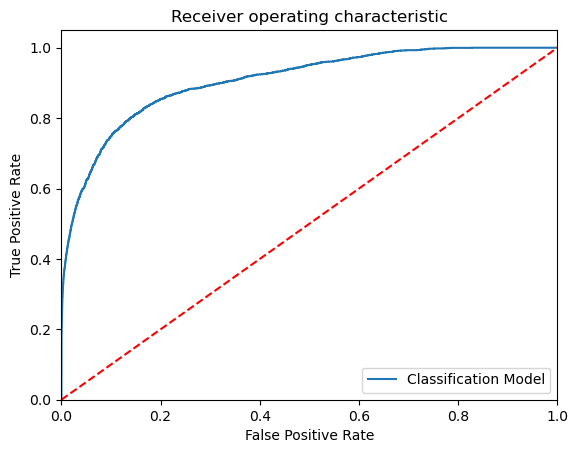

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[   1379    1056]
 [     71 1906280]]
Outcome values : 
 1379 1056 71 1906280
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.57      0.71      2435
           0       1.00      1.00      1.00   1906351

    accuracy                           1.00   1908786
   macro avg       0.98      0.78      0.85   1908786
weighted avg       1.00      1.00      1.00   1908786

Accuracy : 99.9 %
Precision : 95.1 %
Recall : 56.6 %
F1 Score : 0.71
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 78.3 %
MCC : 1.11
roc_auc_score: 0.783


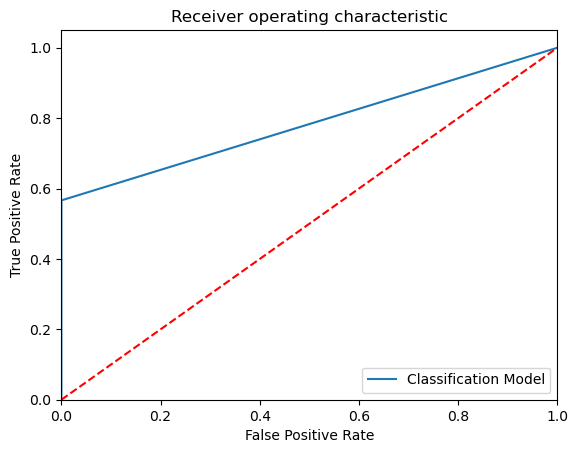

-----------------------------------------------------------------------------------------------------


In [ ]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


# Create objects of classification algorithms with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)


# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelSVM]
# MM = [ModelLR, ModelDC, ModelRF, ModelET]
for models in MM:
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    
    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(abs(mx)), 3)




    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------
#======================================================================================================================>

In [ ]:
#predict the values with DECISION TREE CLASSIFIER algorithm
y_predF=ModelRF.predict(x_test)

In [ ]:
#display the FInal results
Results = pd.DataFrame({'isFraud_A':y_test, 'isFraud_P':y_pred})
#merge two Dataframes on index of both the Dataframes
ResultsFinal =PFdata_bk.merge(Results, left_index=True, right_index=True)
#Display 5 records randomly
ResultsFinal.sample(5)

In [ ]:
EMResults.head()